<a href="https://colab.research.google.com/github/Paulovinicius212/COMANDOS-JS-TRYBER/blob/main/coletando_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6.0 Machine Learning


In [1]:
import sqlite3
import pandas as pd

# Conectar ao banco de dados
conn = sqlite3.connect("database.db")


In [2]:
consulta_atividade = """
SELECT *
FROM flight_activity fa
LEFT JOIN flight_loyalty_history flh ON (fa.loyalty_number=flh.loyalty_number)
"""
df_atividade = pd.read_sql_query(consulta_atividade, conn)


In [3]:
colunas = ["year", "month", "flights_booked", "flights_with_companions", "total_flights",
           "distance", "points_accumulated", "salary", "clv", "loyalty_card"]
df_colunas_selecionadas = df_atividade.loc[:, colunas]
df_treinamento = df_colunas_selecionadas.dropna()


In [4]:
X = df_treinamento.drop(columns="loyalty_card")
y = df_treinamento.loc[:, "loyalty_card"]


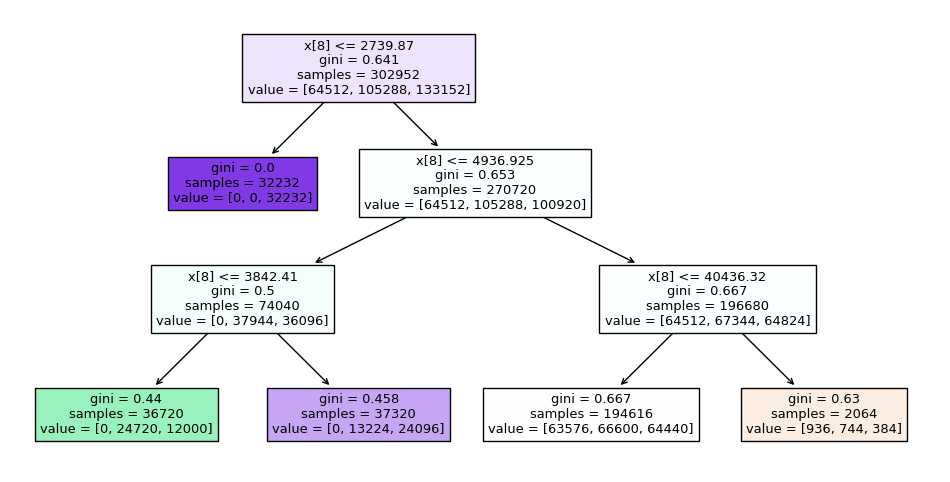

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Definição do modelo
modelo = DecisionTreeClassifier(max_depth=3)

# Treinamento do modelo
modelo_treinado = modelo.fit(X, y)

# Plotagem da árvore treinada
plt.figure(figsize=(12, 6))
plot_tree(modelo_treinado, filled=True)
plt.show()


Fazendo Previsões

In [ ]:
import numpy as np

# Amostra aleatória do conjunto de dados X
X_novo = X.sample()

# Previsão das probabilidades logarítmicas
previsao_log = modelo_treinado.predict_log_proba(X_novo)

# Converter probabilidades logarítmicas para probabilidades reais
previsao = np.exp(previsao_log)

# Impressão das probabilidades
print("Probabilidades - Aurora: {:.2f}% - Nova: {:.2f}% - Start: {:.2f}%".format(
    100 * previsao[0][0], 100 * previsao[0][1], 100 * previsao[0][2])
)


Probabilidades - Aurora: 0.00% - Nova: 67.32% - Start: 32.68%


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:965: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


Painel visualização da propesao

In [ ]:
# Passo 1: Instalar o Gradio
!pip install gradio

In [8]:
# Passo 2: Importar Bibliotecas
import gradio as gr
import numpy as np

# Passo 3: Definir Função de Previsão
def prever_propensao_compra(ano, mes, voos_reservados, voos_com_acompanhantes, total_voos, distancia, pontos_acumulados, salario, clv):
    # Sua lógica de previsão usando o modelo vai aqui
    # Substitua isso pelo seu código de previsão real
    labels = {"Aurora": 0.3, 'Nova': 0.5, 'St': 0.2}
    return labels

# Passo 4: Criar Interface do Gradio
interface = gr.Interface(prever_propensao_compra,
                         [
                             gr.Slider(minimum=0, maximum=2024, step=1, label="Ano"),
                             gr.Slider(minimum=1, maximum=12, step=1, label="Mês"),
                             gr.Slider(minimum=0, maximum=100, step=1, label="Voos Reservados"),
                             gr.Slider(minimum=0, maximum=100, step=1, label="Voos com Acompanhantes"),
                             gr.Slider(minimum=0, maximum=100, step=1, label="Total de Voos"),
                             gr.Slider(minimum=0, maximum=10000, step=100, label="Distância"),
                             gr.Slider(minimum=0, maximum=10000, step=100, label="Pontos Acumulados"),
                             gr.Slider(minimum=0, maximum=100000, step=1000, label="Salário"),
                             gr.Slider(minimum=0, maximum=1000000, step=10000, label="CLV"),
                         ],
                         gr.Label(),
                         title="Propensão de Compra")

# Passo 5: Iniciar a Interface
interface.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://99a33612e13115132d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://99a33612e13115132d.gradio.live
